<h1><center><b>Exploring the European Soccer Database with SQL</b></center></h1>

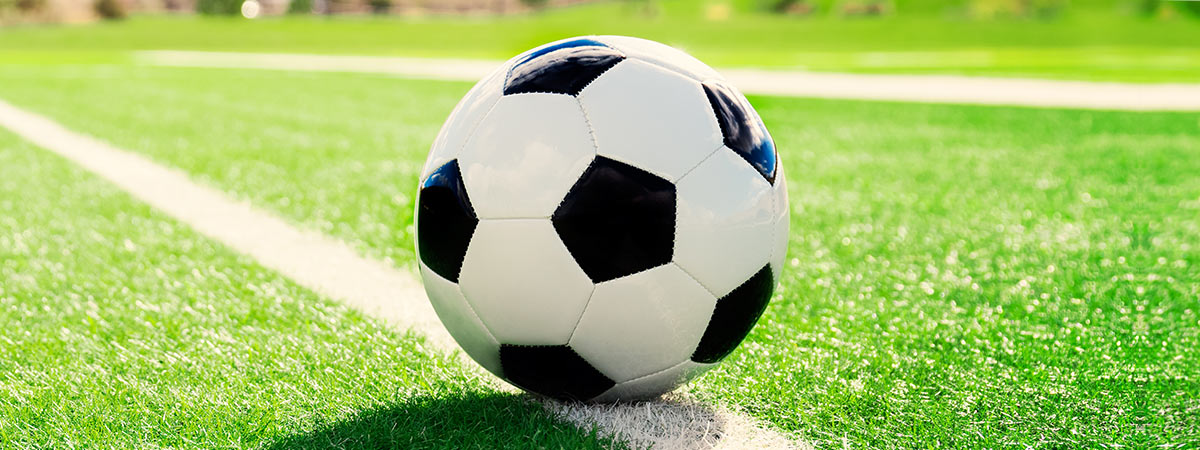

SQL is a skill that is a must-know for any data analyst. The logic behind SQL is very similar to any other tool or language that used for data analysis (excel, Pandas), and for those that used to work with data, should be very intuitive.

In this project, we are going to work on **European Soccer Database**. In this database, we have data of over 25000 matches, 10000 players, 11 European countries with their lead championships, seasons 2008 to 2016, team lineups with squad formation (X, Y coordinates), betting odds from up to 10 providers, detailed match events like fouls, possessions, corners, etc.

#### The European Soccer Database
The European Soccer Database contains information on the teams, match results and players for the top division football leagues across Europe. We can look at every season between 08/09 and 15/16.

#### Defination and why SQL??

SQL is used to communication with a database. According to ANSI(American National Standard Istitute), it is the standard language for relation database management system. SQL statements are used to perform tasks such as update data on a database or retrieve data from database.

Eventually, we will use SQL lunguage to write queries that would pull data from the DB, manipulate it, sort it, and extract it.

The most important component of the DB  is its tables - that's where all the data stored. Usually the data would be devided to many tables, and not stored all in one place (so designing the data stracture properly is very important). Most of this script would handle how to work with tables.



#### Import and Connect
The below code block sets up the pandas and sqlite3 libraries, so we can use this python-based notebook to run SQL queries, as the European Soccer Database comes in the sqlite format.


In [2]:
#Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

database = 'database.sqlite'


#### First we will create the connection to the DB, and see what tables we have

The basic structure of the query is very simple: You define what you want to see after the SELECT, * means all possible columns You choose the table after the FROM You add the conditions for the data you want to use from the table(s) after the WHERE

The structure, and the order of the sections matter, while spaces, new lines, capital words and indentation are there to make the code easier to read.

##### What's in the tables?
Lets start by seeing what is in the tables within our database, which we can get with the below query. Since we are actually running SQL queries in a python notebook, we need to write our SQL statements with a python wrapper around them. The key aspect is to place the SQL statement within each side of three speech marks.


In [4]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""
SELECT *
FROM sqlite_master
WHERE type='table';
""", conn)

display(tables)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


As explained in the introduction, we have tables containing information about players, teams and matches.

####  We are ready to query

##### Query 1: Retrieve the names of all countries from the "Country" table.

In [6]:
query1 = pd.read_sql("""
SELECT name
FROM Country;
""", conn)

query1

,name
0,Belgium
1,England
2,France
3,Germany
4,Italy
5,Netherlands
6,Poland
7,Portugal
8,Scotland
9,Spain


##### Query 2: Retrieve the names of all leagues from the "League" table for the country with the name 'Spain'.

In [7]:
query2 = pd.read_sql("""
SELECT name
FROM League
WHERE country_id = (
    SELECT id
    FROM Country
    WHERE name = 'Spain'
);
""", conn)

query2

,name
0,Spain LIGA BBVA


##### Query 3: Retrieve the match details (match_api_id, home_team_goal, away_team_goal) along with the names of the home team and away team for the matches played in the '2015/2016' season.

In [8]:
query3 = pd.read_sql("""
SELECT M.match_api_id, M.home_team_goal, M.away_team_goal, TH.team_long_name AS home_team, TA.team_long_name AS away_team
FROM Match M
JOIN Team TH ON M.home_team_api_id = TH.team_api_id
JOIN Team TA ON M.away_team_api_id = TA.team_api_id
WHERE M.season = '2015/2016';
""", conn)

query3

,match_api_id,home_team_goal,away_team_goal,home_team,away_team
0,1979832,2,1,Sint-Truidense VV,Club Brugge KV
1,1979833,2,1,KV Kortrijk,Standard de Liège
2,1979834,3,1,KRC Genk,Oud-Heverlee Leuven
3,1979835,3,1,KV Oostende,KV Mechelen
4,1979836,3,1,SV Zulte-Waregem,Sporting Lokeren
...,...,...,...,...,...
3321,1992091,1,0,FC St. Gallen,FC Thun
3322,1992092,1,2,FC Vaduz,FC Luzern
3323,1992093,2,0,Grasshopper Club Zürich,FC Sion
3324,1992094,0,0,Lugano,FC Zürich


##### Query 4: Retrieve the total number of goals scored by each team in the "Match" table, grouped by the country and league they belong to.


In [12]:
query4 = pd.read_sql("""
SELECT C.name AS country_name, L.name AS league_name, T.team_long_name, SUM(M.home_team_goal + M.away_team_goal) AS total_goals
FROM Match M
JOIN Team T ON M.home_team_api_id = T.team_api_id
JOIN League L ON M.league_id = L.id
JOIN Country C ON L.country_id = C.id
GROUP BY C.name, L.name, T.team_long_name;
""", conn)

query4

,country_name,league_name,team_long_name,total_goals
0,Belgium,Belgium Jupiler League,Beerschot AC,210
1,Belgium,Belgium Jupiler League,Club Brugge KV,330
2,Belgium,Belgium Jupiler League,FCV Dender EH,44
3,Belgium,Belgium Jupiler League,KAA Gent,326
4,Belgium,Belgium Jupiler League,KAS Eupen,37
...,...,...,...,...
291,Switzerland,Switzerland Super League,FC Zürich,413
292,Switzerland,Switzerland Super League,Grasshopper Club Zürich,396
293,Switzerland,Switzerland Super League,Lugano,56
294,Switzerland,Switzerland Super League,Neuchâtel Xamax,207


##### Query 5: Retrieve the average number of goals scored per match for teams that have played at least 10 matches in the "Match" table.

In [13]:
query5 = pd.read_sql("""
SELECT T.team_long_name, COUNT(M.match_api_id) AS match_count, AVG(M.home_team_goal + M.away_team_goal) AS average_goals
FROM Team T
JOIN Match M ON T.team_api_id = M.home_team_api_id
GROUP BY T.team_long_name
HAVING COUNT(M.match_api_id) >= 10;
""", conn)

query5

,team_long_name,match_count,average_goals
0,1. FC Kaiserslautern,34,2.470588
1,1. FC Köln,102,2.500000
2,1. FC Nürnberg,85,2.658824
3,1. FSV Mainz 05,119,2.521008
4,AC Ajaccio,57,2.473684
...,...,...,...
291,Xerez Club Deportivo,19,2.578947
292,Zagłębie Lubin,90,2.488889
293,Zawisza Bydgoszcz,30,2.700000
294,Évian Thonon Gaillard FC,76,2.736842


##### Query 6: Retrieve the names of players and their heights from the "Player" table, sorted in descending order of height.

In [14]:
query6 = pd.read_sql("""
SELECT player_name, height
FROM Player
ORDER BY height DESC;
""", conn)

query6

,player_name,height
0,Kristof van Hout,208.28
1,Bogdan Milic,203.20
2,Costel Pantilimon,203.20
3,Fejsal Mulic,203.20
4,Jurgen Wevers,203.20
...,...,...
11055,Quentin Othon,162.56
11056,Samuel Asamoah,162.56
11057,Diego Buonanotte,160.02
11058,Maxi Moralez,160.02


##### Query 7: Retrieve the top 10 teams with the highest number of goals scored in a match from the "Team" table.

In [15]:
query7 = pd.read_sql("""
SELECT team_long_name, COUNT(match_api_id) AS goals_scored
FROM Team
JOIN Match ON Team.team_api_id = Match.home_team_api_id
WHERE home_team_goal > 0
GROUP BY team_long_name
ORDER BY goals_scored DESC
LIMIT 10;
""", conn)

query7

,team_long_name,goals_scored
0,FC Barcelona,146
1,Real Madrid CF,145
2,Juventus,144
3,Celtic,139
4,Manchester City,138
5,Chelsea,137
6,Manchester United,136
7,Roma,135
8,Atlético Madrid,134
9,Valencia CF,133


##### Query 8: Retrieve the unique seasons from the "Match" table.

In [16]:
query8 = pd.read_sql("""
SELECT DISTINCT season
FROM Match;
""", conn)

query8

,season
0,2008/2009
1,2009/2010
2,2010/2011
3,2011/2012
4,2012/2013
5,2013/2014
6,2014/2015
7,2015/2016


##### Query 9: Retrieve the names of players from the "Player" table whose height is not recorded (NULL).

In [17]:
query9 = pd.read_sql("""
SELECT player_name
FROM Player
WHERE height IS NULL;
""", conn)

query9

,player_name


##### Query 10: Retrieve the names of players from the "Player" table who have a higher height than the overall average height of all players.

In [18]:
query10 = pd.read_sql("""
SELECT player_name
FROM Player
WHERE height > (
    SELECT AVG(height)
    FROM Player
);
""", conn)

query10

,player_name
0,Aaron Appindangoye
1,Aaron Galindo
2,Aaron Hughes
3,Aaron Hunt
4,Aaron Lennox
...,...
5865,Zoran Rendulic
5866,Zouhair Feddal
5867,Zoumana Camara
5868,Zsolt Laczko


##### Query 11: Retrieve the matches from the "Match" table where the number of goals scored by the home team is between 3 and 5 (inclusive).

In [19]:
query11 = pd.read_sql("""
SELECT *
FROM Match
WHERE home_team_goal BETWEEN 3 AND 5;
""", conn)

query11

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
1,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00
2,35,1,1,2008/2009,12,2008-11-15 00:00:00,492589,4049,9984,3,...,1.83,4.00,3.50,1.75,4.25,3.30,1.75,4.33,3.30,1.73
3,36,1,1,2008/2009,12,2008-11-14 00:00:00,492590,10001,9991,3,...,2.80,2.50,3.20,2.60,2.45,3.20,2.75,2.30,3.20,2.75
4,38,1,1,2008/2009,13,2008-11-22 00:00:00,492592,9985,9996,3,...,8.50,1.35,4.00,7.50,1.37,4.25,8.00,1.36,4.20,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5125,25971,24558,24558,2015/2016,8,2015-09-12 00:00:00,1992087,10192,9824,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5126,25972,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992088,10199,9956,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5127,25973,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992089,10243,10191,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5128,25974,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992090,10179,7896,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Query 12: Retrieve the names of teams from the "Team" table whose long name starts with 'FC'.

In [20]:
query12 = pd.read_sql("""
SELECT team_long_name
FROM Team
WHERE team_long_name LIKE 'FC%';
""", conn)

query12

,team_long_name
0,FCV Dender EH
1,FC Nantes
2,FC Lorient
3,FC Sochaux-Montbéliard
4,FC Metz
5,FC Bayern Munich
6,FC Schalke 04
7,FC Energie Cottbus
8,FC St. Pauli
9,FC Augsburg


##### Query 13: Retrieve the number of matches played in each league from the "Match" table.

In [21]:
query13 = pd.read_sql("""
SELECT L.name AS league_name, COUNT(*) AS match_count
FROM Match M
JOIN League L ON M.league_id = L.id
GROUP BY L.name;
""", conn)

query13

,league_name,match_count
0,Belgium Jupiler League,1728
1,England Premier League,3040
2,France Ligue 1,3040
3,Germany 1. Bundesliga,2448
4,Italy Serie A,3017
5,Netherlands Eredivisie,2448
6,Poland Ekstraklasa,1920
7,Portugal Liga ZON Sagres,2052
8,Scotland Premier League,1824
9,Spain LIGA BBVA,3040


##### Query 14: Retrieve the player name and the highest height from the "Player" table.

In [22]:
query14 = pd.read_sql("""
SELECT player_name, MAX(height) AS highest_height
FROM Player;
""", conn)

query14

,player_name,highest_height
0,Kristof van Hout,208.28


##### Query 15: Retrieve the player name and the lowest weight from the "Player" table.

In [23]:
query15 = pd.read_sql("""
SELECT player_name, MIN(weight) AS lowest_weight
FROM Player;
""", conn)

query15

,player_name,lowest_weight
0,Juan Quero,117


##### Query 16: Retrieve the total number of goals scored by each team in the "Match" table.

In [24]:
query16 = pd.read_sql("""
SELECT team_long_name, SUM(home_team_goal + away_team_goal) AS total_goals
FROM Match
JOIN Team ON home_team_api_id = team_api_id
GROUP BY team_long_name;
""", conn)

query16

,team_long_name,total_goals
0,1. FC Kaiserslautern,84
1,1. FC Köln,255
2,1. FC Nürnberg,226
3,1. FSV Mainz 05,300
4,AC Ajaccio,141
...,...,...
291,Xerez Club Deportivo,49
292,Zagłębie Lubin,224
293,Zawisza Bydgoszcz,81
294,Évian Thonon Gaillard FC,208


##### Query 17: Retrieve the average weight of players in the "Player" table.

In [25]:
query17 = pd.read_sql("""
SELECT AVG(weight) AS avg_weight
FROM Player;
""", conn)

query17

,avg_weight
0,168.380289


##### Query 18: Retrieve the names of teams from the "Team" table that have played matches in either '2012/2013' or '2013/2014' seasons.

In [26]:
query18 = pd.read_sql("""
SELECT team_long_name
FROM Team
WHERE team_api_id IN (
    SELECT home_team_api_id
    FROM Match
    WHERE season IN ('2012/2013', '2013/2014')
);
""", conn)

query18

,team_long_name
0,Ruch Chorzów
1,Oud-Heverlee Leuven
2,Jagiellonia Białystok
3,S.C. Olhanense
4,Lech Poznań
...,...
204,Valencia CF
205,Elche CF
206,VfB Stuttgart
207,Real Valladolid


##### Query 19: Retrieve all the matches played.

In this exapmle we will show only the columns that interests us, so instead of * we will use the exact names.

Some of the cells have the same name (Country.name,League.name). We will rename them using AS.

As you can see, this query has much more joins. The reasons is because the DB is designed in a star
structure - one table (Match) with all the "performance" and metrics, but only keys and IDs,
while all the descriptive information stored in other tables (Country, League, Team)

Note that Team is joined twice. This is a tricky one, as while we are using the same table name, we basically bring two different copies (and rename them using AS). The reason is that we need to bring information about two different values (home_team_api_id, away_team_api_id), and if we join them to the same table, it would mean that they are equal to each other.

You will also note that the Team tables are joined using left join. The reason is that I would prefer to keep the matches in the output - even if one of the teams is missing from the Team table for some reason.

ORDER defines the order of the output, and comes before the LIMIT and after the WHERE.

In [27]:
query19 = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;"""
, conn)

query19

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


##### Query 20: Complex Query to find the height distribution.

In our example, I'm trying to join between a table that holds players' basic details (name, height, weight), to a table that holds more attributes. The problem is that while the first table holds one row for each player, the key in the second table is player+season, so if we do a regular join, the result would be a cartesian product, and each player's basic details would appear as many times as this player appears in the attributes table. The result would be that the average would be skewed towards players that appear many times in the attribute table.

The solution, is to use a subquery.  We would need to group the attributes table, to a different key - player level only (without season). Of course we would need to decide first how we would want to combine all the attributes to a single row. I used average, but one can also decide on maximum, latest season and etc. 
Once both tables have the same keys, we can join them together (think of the subquery as any other table, only temporal), knowing that we won't have duplicated rows after the join.

In addition, you can see here two examples of how to use functions:
* Conditional function is an important tool for data manipulation. While IF statement is very popular in other languages, SQLite is not supporting it, and it's implemented using CASE + WHEN + ELSE statement. 
As you can see, based on the input of the data, the query would return different results.

* ROUND - straight sorward.
Every SQL languages comes with a lot of usefull functions by default.

In [30]:
query20 = pd.read_sql("""
SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height;""", conn)

query20

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


## Summary: 

#### Query Run Order
Now that we are familiar with most of the functionalities being used in a query, it is very important to understand the order that code runs.

As we mentioned, here is the order as it would appear in the code:
* SELECT
* FROM
* JOIN
* WHERE
* GROUP BY
* HAVING
* ORDER BY
* LIMIT

